<a href="https://colab.research.google.com/github/sahar-mariam/level2-report/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

In [3]:
# Load a sample dataset (Iris dataset for illustration)
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)


In [5]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [6]:
# Display feature importance
feature_importance = clf.feature_importances_
print("\nFeature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i + 1}: {importance}")


Feature Importance:
Feature 1: 0.10809762464246378
Feature 2: 0.030386812473242528
Feature 3: 0.43999397414456937
Feature 4: 0.4215215887397244


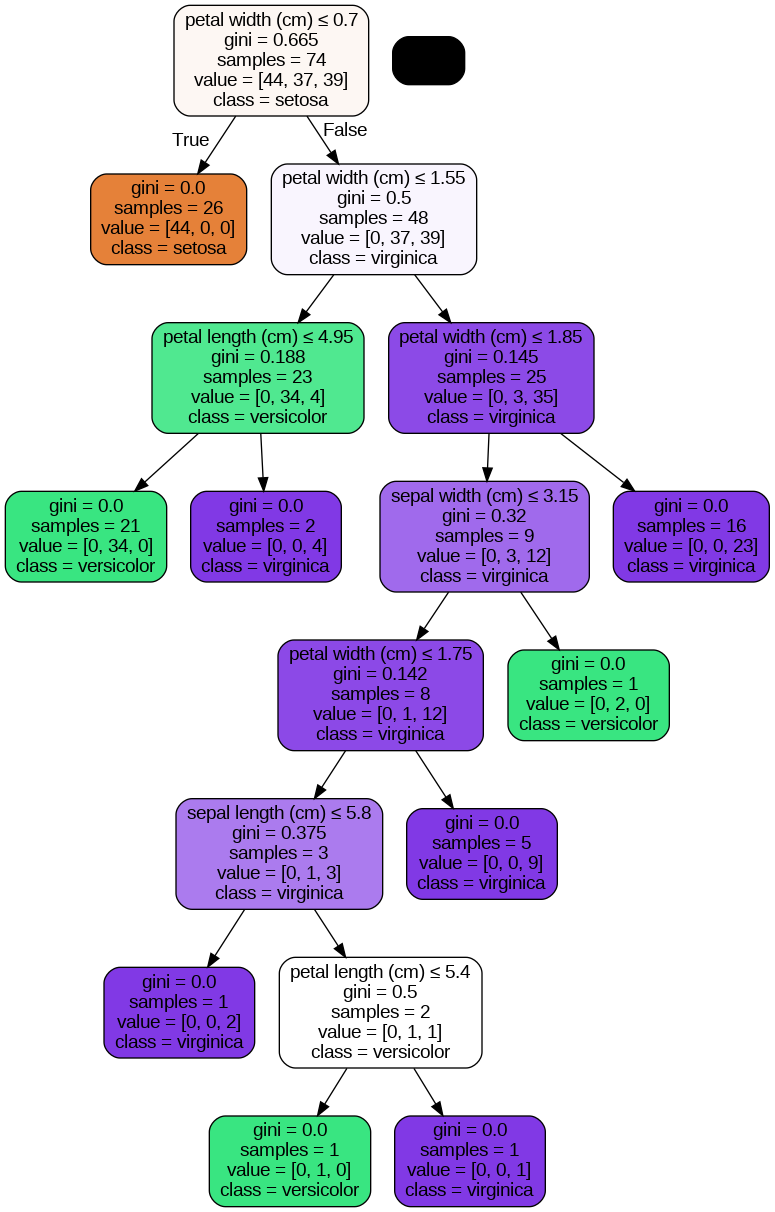

In [7]:
# to visualize the Random Forest
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
tree = clf.estimators_[0]  # Choose the first tree in the forest
dot_data = export_graphviz(tree, out_file=None, feature_names=iris.feature_names,
                            class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())